In [1]:
import os
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
import missingno as msno

In [3]:
# cargar los datos en csv
data = pd.read_csv('dataset_3.csv',
                   sep=';', #Parámetro de separación de datos
                   encoding='utf-8' #Codificación de datos
                  )
data.drop(data.columns[0],axis=1,inplace=True)
print(data.shape)
#visualizar los primeros registros
data.head(5)

(5029969, 18)


,coord_y,coord_x,Cobertura,Curvatura,Distancia_Drenajes,Distancia_Fallas,Distancia_Vias,DTM,Geologia,Geomorfologia,NDVI,Orientaciones,Rugosidad,Slope,TPI,UGS,is_slide,slide_FK
0,637085.126257,965898.966867,7.0,-1.972500,80.039055,8860.464,37.500000,2551.3591,7.0,12.0,0.209492,355.293000,255.0,5.959947,15.154297,8.0,False,0.0
1,637072.626257,965898.966867,7.0,1.644062,88.388350,8852.269,25.000000,2554.2786,7.0,12.0,0.209492,14.471906,255.0,6.341040,17.635742,8.0,False,0.0
2,637110.126257,965911.466867,7.0,2.063750,72.886900,8867.471,63.737743,2547.0962,7.0,12.0,0.209140,63.449420,255.0,13.375040,12.150391,8.0,False,0.0
3,637097.626257,965911.466867,7.0,2.821250,80.039055,8859.246,51.538822,2549.3420,7.0,12.0,0.209140,48.567110,255.0,14.689607,13.618164,8.0,False,0.0
4,637085.126257,965911.466867,7.0,2.158594,88.388350,8851.033,39.528470,2551.5217,7.0,12.0,0.209492,40.382770,255.0,13.636049,15.251465,8.0,False,0.0


## Variable Cobertura

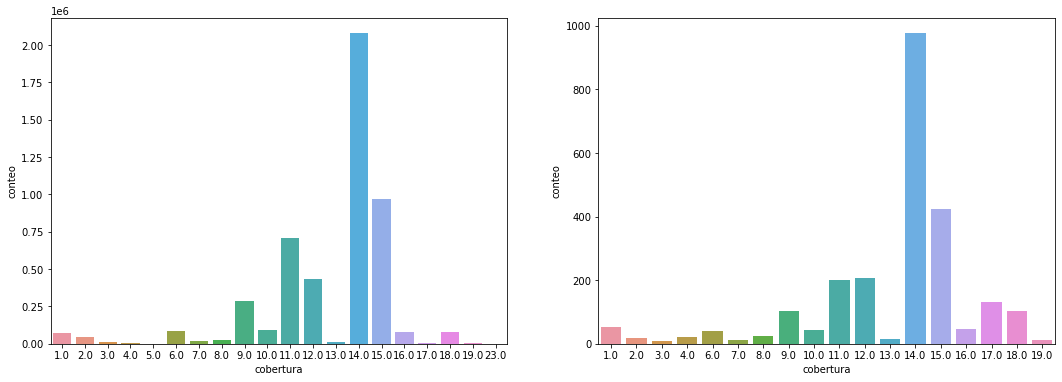

In [4]:
%matplotlib inline
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_cobertura = data.groupby(['is_slide','Cobertura']).size().reset_index(name="cnt")
# cambiamos el nombre de las columnas
data_cobertura.columns=['derrumbe','cobertura','conteo']
fig, ax = plt.subplots(1, 2,figsize=(18,6))
sns.barplot(x = "cobertura", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==False], ax=ax[0])
sns.barplot(x = "cobertura", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==True], ax=ax[1])
plt.show()

## Variable Curvatura

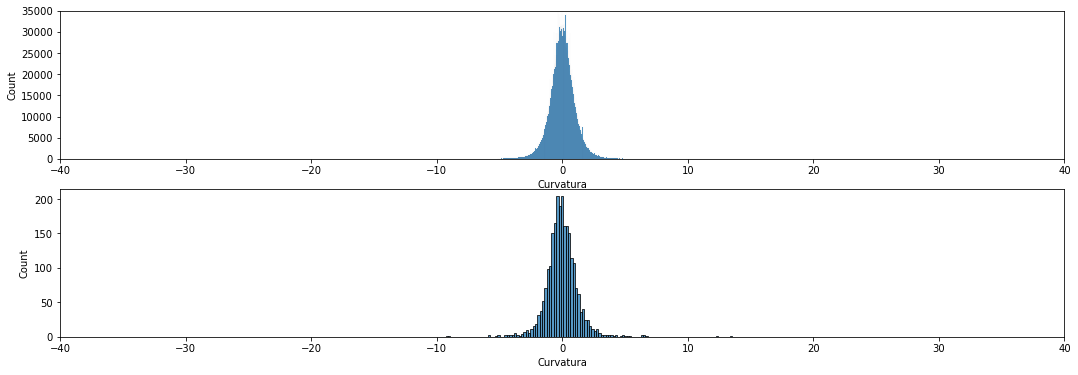

In [15]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Curvatura", data = data[data.is_slide==False], ax=ax[0])
ax[0].set_xlim(-40,40)
ax[0].set_ylim(0,35000)
sns.histplot(x = "Curvatura", data = data[data.is_slide==True], ax=ax[1])
ax[1].set_xlim(-40,40)
plt.show()

## Variable Distancia_Drenajes

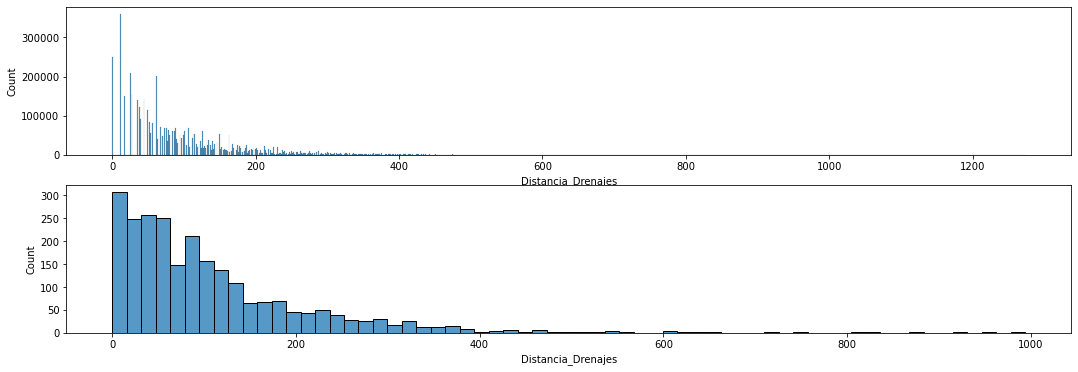

In [16]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Distancia_Drenajes", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Distancia_Drenajes", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variabel Distancia_Fallas

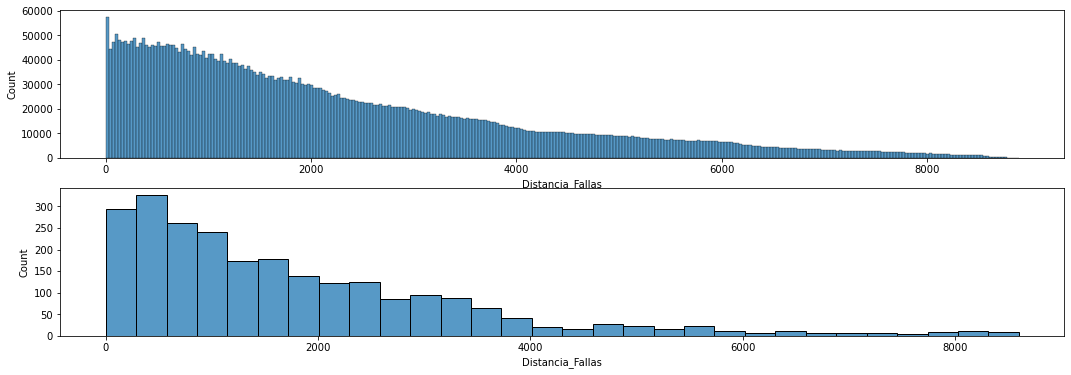

In [17]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Distancia_Fallas", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Distancia_Fallas", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable Distancia_Vias

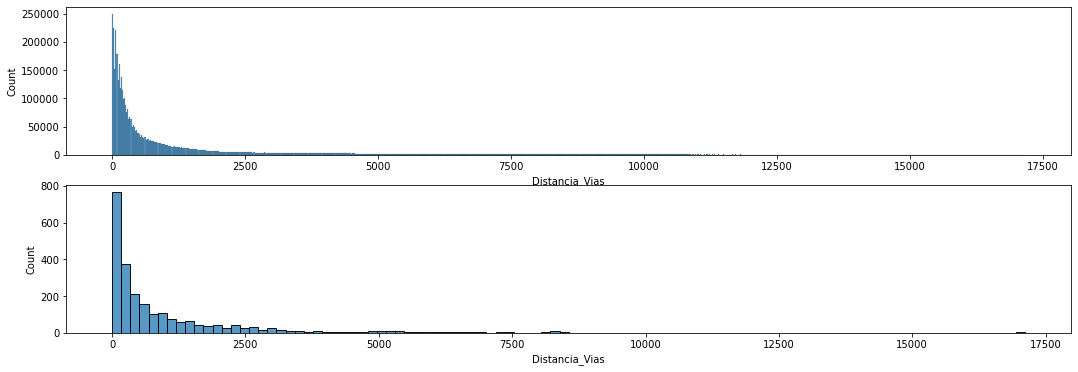

In [18]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Distancia_Vias", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Distancia_Vias", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable DTM

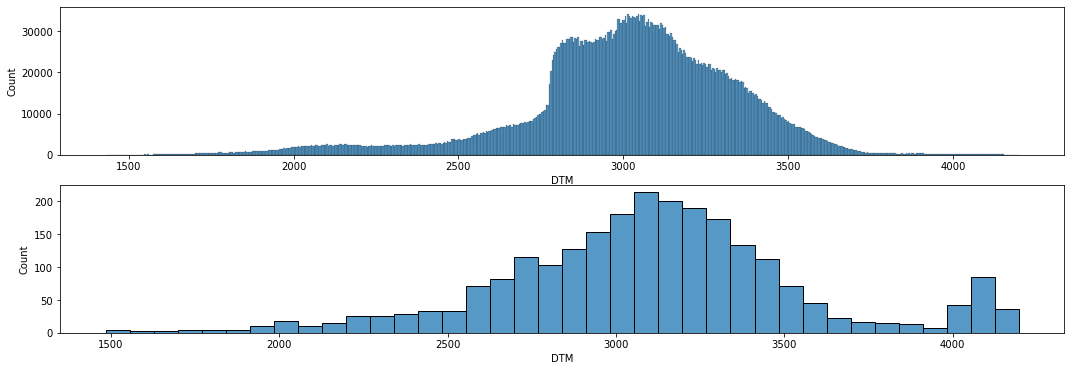

In [19]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "DTM", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "DTM", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable Geologia

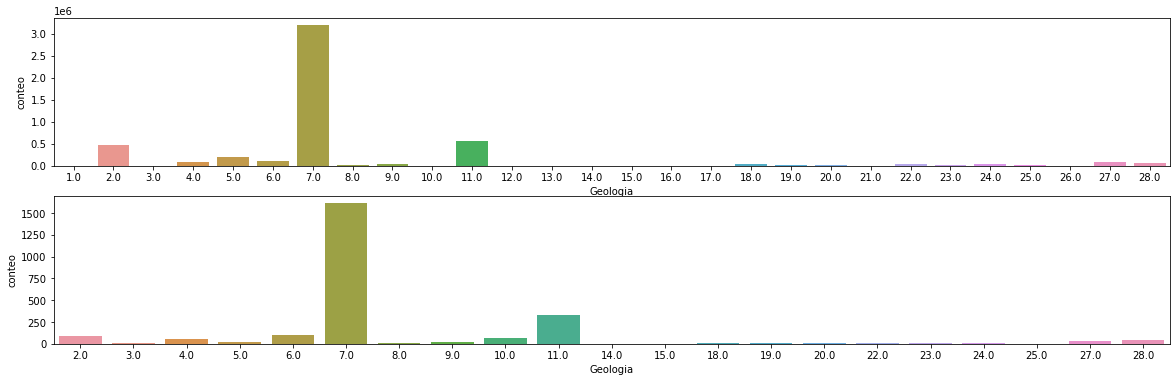

In [24]:
%matplotlib inline
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_cobertura = data.groupby(['is_slide','Geologia']).size().reset_index(name="cnt")
# cambiamos el nombre de las columnas
data_cobertura.columns=['derrumbe','Geologia','conteo']
fig, ax = plt.subplots(2, 1,figsize=(20,6))
sns.barplot(x = "Geologia", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==False], ax=ax[0])
sns.barplot(x = "Geologia", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==True], ax=ax[1])
plt.show()

## Variable Geomorfologia

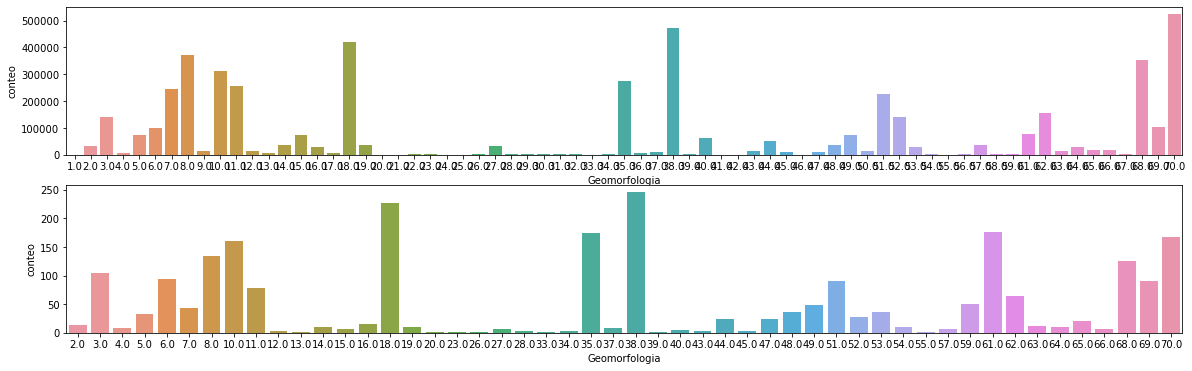

In [25]:
%matplotlib inline
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_cobertura = data.groupby(['is_slide','Geomorfologia']).size().reset_index(name="cnt")
# cambiamos el nombre de las columnas
data_cobertura.columns=['derrumbe','Geomorfologia','conteo']
fig, ax = plt.subplots(2, 1,figsize=(20,6))
sns.barplot(x = "Geomorfologia", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==False], ax=ax[0])
sns.barplot(x = "Geomorfologia", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==True], ax=ax[1])
plt.show()

## Variable NDVI

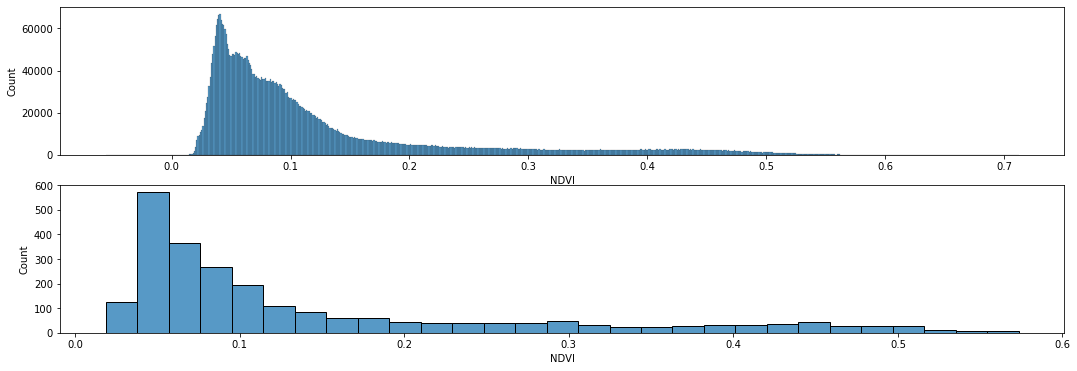

In [26]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "NDVI", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "NDVI", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable Orientaciones

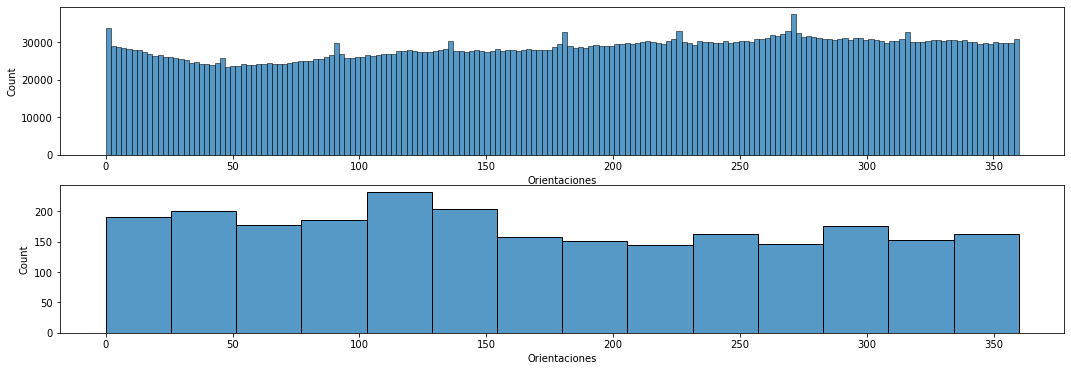

In [21]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Orientaciones", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Orientaciones", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable Rugosidad

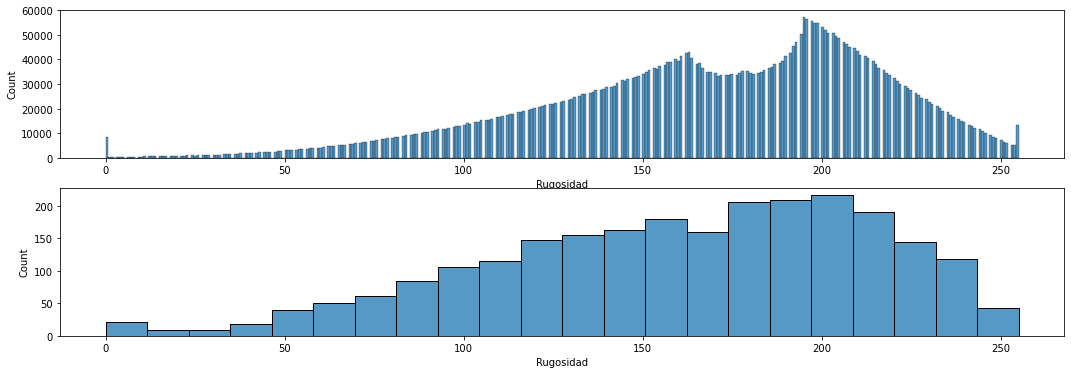

In [27]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Rugosidad", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Rugosidad", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable Slope

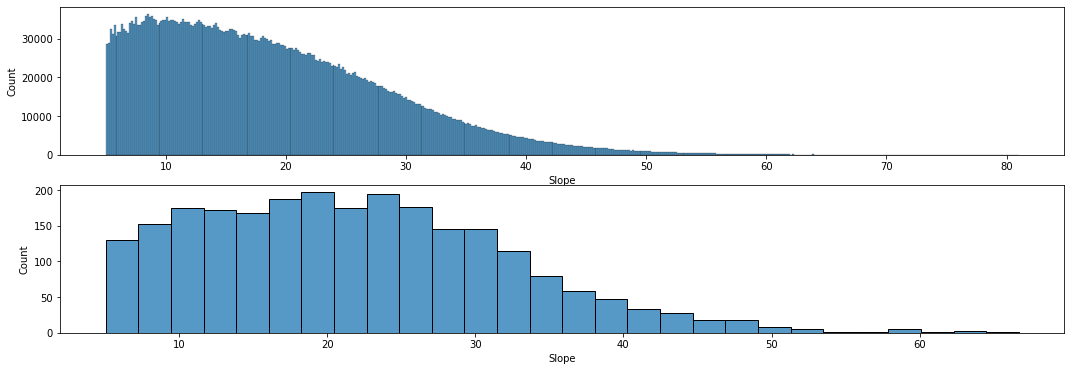

In [28]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "Slope", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "Slope", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variables TPI

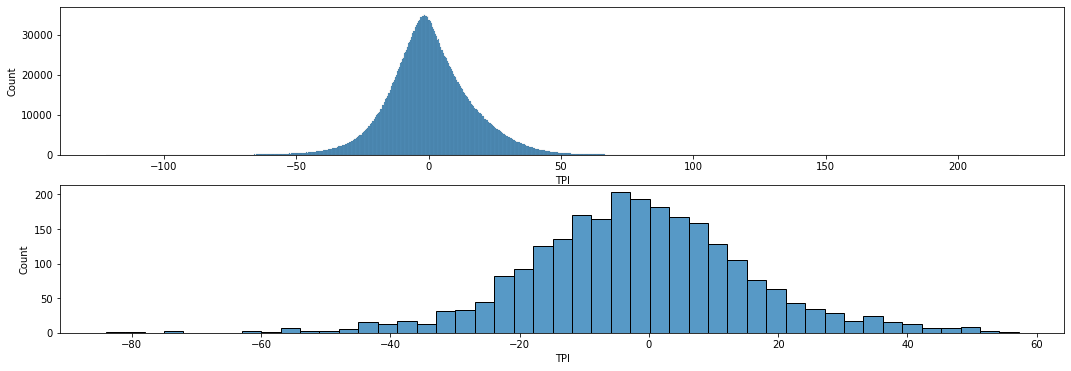

In [29]:
fig, ax = plt.subplots(2, 1,figsize=(18,6))
sns.histplot(x = "TPI", data = data[data.is_slide==False], ax=ax[0])
#ax[0].set_xlim(-40,40)
#ax[0].set_ylim(0,35000)
sns.histplot(x = "TPI", data = data[data.is_slide==True], ax=ax[1])
#ax[1].set_xlim(-40,40)
plt.show()

## Variable UGS

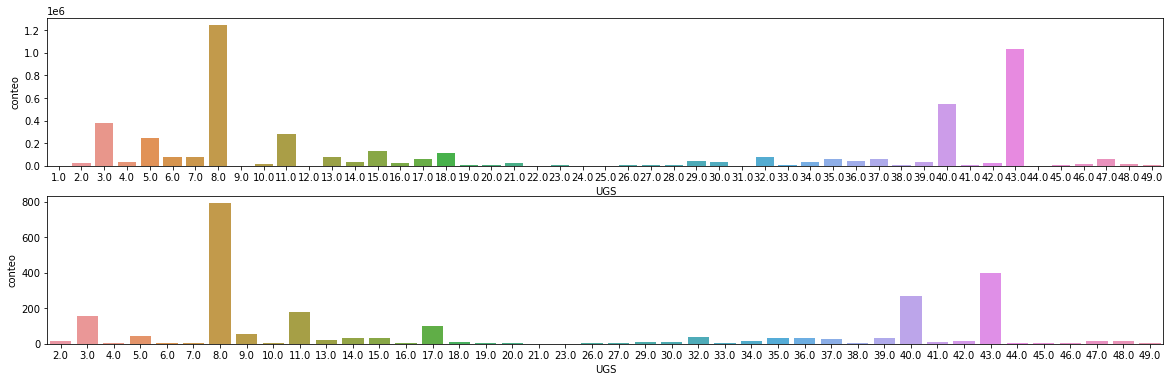

In [31]:
%matplotlib inline
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_cobertura = data.groupby(['is_slide','UGS']).size().reset_index(name="cnt")
# cambiamos el nombre de las columnas
data_cobertura.columns=['derrumbe','UGS','conteo']
fig, ax = plt.subplots(2, 1,figsize=(20,6))
sns.barplot(x = "UGS", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==False], ax=ax[0])
sns.barplot(x = "UGS", y = "conteo", data = data_cobertura[data_cobertura.derrumbe==True], ax=ax[1])
plt.show()